In [ ]:
!pip install pyserini
!pip install dice-ml
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 104.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 89.9 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import pyserini
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

In [ ]:
from pyserini.search import get_topics
topics = get_topics('msmarco-passage-dev-subset')
print(f'{len(topics)} queries total')

6980 queries total


In [ ]:
topics

{1102330: {'title': 'why do people grind teeth in sleep'},
 160885: {'title': 'do you need immunizations for belize'},
 1091115: {'title': 'recurrent gastric cancer symptoms'},
 613179: {'title': 'what county is stafford tx'},
 1091116: {'title': 'recommended temperature'},
 1092441: {'title': 'most romantic zodiac sign'},
 1091112: {'title': 'redux phone number'},
 1093773: {'title': 'jefferson college address'},
 867490: {'title': 'what kind of doctor is dr. nassar'},
 31595: {'title': 'average car bill in florida'},
 54235: {'title': 'black death effects on europe culture'},
 1091108: {'title': 'refers to what happens when sensory information is detected by a sensory receptor'},
 306105: {'title': 'how much do jockeys have to weigh'},
 914321: {'title': 'what type of rna carries the information that specifies a protein?'},
 1102335: {'title': 'why do people buy cars'},
 1066161: {'title': 'what is a tool used to'},
 93823: {'title': 'co-curricular vs extracurricular definition'},
 8

In [ ]:
from pyserini.search import LuceneSearcher

searcher = LuceneSearcher.from_prebuilt_index('msmarco-passage')

lucene-index.msmarco-v1-passage.20221004.252b5e.tar.gz: 2.02GB [02:19, 15.6MB/s]                            


In [ ]:
query = 'average rent in california'

hits = searcher.search(query,30)

In [ ]:
import math
from pyserini.index.lucene import IndexReader
from sklearn.feature_extraction.text import TfidfVectorizer
indexer = IndexReader.from_prebuilt_index('msmarco-v1-passage')
total_documents = indexer.stats()["documents"]

def calculate_idf(word):
    df,cf = indexer.get_term_counts(word)

    idf = math.log(total_documents / (df + 1))

    return idf



In [ ]:
import json

# Prints the first 10 hits
for i in range(0, 30):
    jsondoc = json.loads(hits[i].raw)
    print(f'{i+1:2} {hits[i].score:.5f} {jsondoc["id"]} {jsondoc["contents"][:1000]}..')

 1 10.16700 8599033 Rent trend data in Davis, California. As of July 2016, average apartment rent within the city of of Davis, CA is $1458. One bedroom apartments in Davis rent for $1197 a month on average and two bedroom apartment rents average $1529...
 2 10.15480 5440735 Rent trend data in Oakland, California Get more detailed neighborhood and address specific results here. Oakland Average Rent. As of December 2017, average rent for an apartment in Oakland, CA is $2538 which is a 8.51% decrease from last year when the average rent was $2754 , and a 2.09% decrease from last month when the average rent was $2591...
 3 10.12070 5639218 The average cost of renting an apartment in California is approximately $1,500 per month, however as with home values, prices fluctuate throughout the state.Median Rent in California. 1  Los Angeles: Approx. 2  $1500/mo. 3  San Francisco: Approx. 4  $2100/mo. 5  San Jose: Approx. 6  $1800/mo.he average cost of renting an apartment in California is approx

In [ ]:
documents = []

for i in range(0,30):

    jsondoc = json.loads(hits[i].raw)
    documents.append(jsondoc["contents"][:1000])

In [ ]:
documents

['Rent trend data in Davis, California. As of July 2016, average apartment rent within the city of of Davis, CA is $1458. One bedroom apartments in Davis rent for $1197 a month on average and two bedroom apartment rents average $1529.',
 'Rent trend data in Oakland, California Get more detailed neighborhood and address specific results here. Oakland Average Rent. As of December 2017, average rent for an apartment in Oakland, CA is $2538 which is a 8.51% decrease from last year when the average rent was $2754 , and a 2.09% decrease from last month when the average rent was $2591.',
 'The average cost of renting an apartment in California is approximately $1,500 per month, however as with home values, prices fluctuate throughout the state.Median Rent in California. 1  Los Angeles: Approx. 2  $1500/mo. 3  San Francisco: Approx. 4  $2100/mo. 5  San Jose: Approx. 6  $1800/mo.he average cost of renting an apartment in California is approximately $1,500 per month, however as with home values,

In [ ]:
tokenized_documents = [doc.split() for doc in documents]


In [ ]:
preprocessed_documents = [' '.join(doc) for doc in tokenized_documents]
preprocessed_documents


['Rent trend data in Davis, California. As of July 2016, average apartment rent within the city of of Davis, CA is $1458. One bedroom apartments in Davis rent for $1197 a month on average and two bedroom apartment rents average $1529.',
 'Rent trend data in Oakland, California Get more detailed neighborhood and address specific results here. Oakland Average Rent. As of December 2017, average rent for an apartment in Oakland, CA is $2538 which is a 8.51% decrease from last year when the average rent was $2754 , and a 2.09% decrease from last month when the average rent was $2591.',
 'The average cost of renting an apartment in California is approximately $1,500 per month, however as with home values, prices fluctuate throughout the state.Median Rent in California. 1 Los Angeles: Approx. 2 $1500/mo. 3 San Francisco: Approx. 4 $2100/mo. 5 San Jose: Approx. 6 $1800/mo.he average cost of renting an apartment in California is approximately $1,500 per month, however as with home values, price

In [ ]:
from spacy.lang.de.stop_words import STOP_WORDS
import pandas as pd
import numpy as np

In [ ]:
total_docs = indexer.stats().get('documents')

total_docs

8841823

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

vectors = []
top_words_list = []
tfidf_vectorizer = TfidfVectorizer(stop_words = list(ENGLISH_STOP_WORDS),use_idf = False)
for paragraph in preprocessed_documents:
    tfidf = tfidf_vectorizer.fit_transform([paragraph])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    # tfidf_ms = calculate_idf(feature_names)
    tfidf_scores = zip(feature_names, tfidf.sum(axis=0).tolist()[0])
    sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
    top_words = [word for word, score in sorted_scores[:10]]
    top_words_list.append(top_words)
    vector = [tfidf[0, tfidf_vectorizer.vocabulary_[word]] for word in top_words]
    vectors.append(vector)

# Print the resulting top 10 words and vectors for each paragraph
for i in range(len(preprocessed_documents)):
    print(f"Top 10 words for paragraph {i+1}: {top_words_list[i]}")
    print(f"TF-IDF vector features for paragraph {i+1}: {vectors[i]}")

Top 10 words for paragraph 1: ['average', 'davis', 'rent', 'apartment', 'bedroom', '1197', '1458', '1529', '2016', 'apartments']
TF-IDF vector features for paragraph 1: [0.43301270189221935, 0.43301270189221935, 0.43301270189221935, 0.2886751345948129, 0.2886751345948129, 0.14433756729740646, 0.14433756729740646, 0.14433756729740646, 0.14433756729740646, 0.14433756729740646]
Top 10 words for paragraph 2: ['rent', 'average', 'oakland', 'decrease', '09', '2017', '2538', '2591', '2754', '51']
TF-IDF vector features for paragraph 2: [0.5852057359806528, 0.4681645887845223, 0.3511234415883917, 0.23408229439226114, 0.11704114719613057, 0.11704114719613057, 0.11704114719613057, 0.11704114719613057, 0.11704114719613057, 0.11704114719613057]
Top 10 words for paragraph 3: ['approx', 'california', 'mo', '500', 'apartment', 'approximately', 'average', 'cost', 'fluctuate', 'home']
TF-IDF vector features for paragraph 3: [0.31980107453341566, 0.31980107453341566, 0.31980107453341566, 0.2132007163556

In [ ]:

import pandas as pd

doc_ar = []
for i in range(0,30):

  jsonload = json.loads(hits[i].raw)
  doc_ar.append(jsonload)

doc_df = pd.json_normalize(doc_ar)


In [ ]:
doc_df

,id,contents
0,8599033,"Rent trend data in Davis, California. As of Ju..."
1,5440735,"Rent trend data in Oakland, California Get mor..."
2,5639218,The average cost of renting an apartment in Ca...
3,6167397,The average cost of renting an apartment in Ca...
4,5639212,"In general, the cost of living in California i..."
5,2911754,"Today, an average California home costs $440,0..."
6,2383513,"This trend has continued. Today, an average Ca..."
7,6699804,The site says that California rents have incre...
8,6699811,"West Hollywood, with an average two-bed rent o..."
9,8416719,"The median home price for homes in Carlsbad, C..."


In [ ]:
doc_df['top10_words'] = top_words_list
doc_df['tfidf_vector'] = vectors

doc_df

,id,contents,top10_words,tfidf_vector
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4..."
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351..."
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3..."
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294..."
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26..."
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318..."
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28..."
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188..."
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182..."
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3..."


In [ ]:
doc_df['Score'] = 0

for i in range(0,30):
  doc_df.loc[i, 'Score'] = hits[i].score

doc_df

,id,contents,top10_words,tfidf_vector,Score
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393


In [ ]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30 non-null     object 
 1   contents      30 non-null     object 
 2   top10_words   30 non-null     object 
 3   tfidf_vector  30 non-null     object 
 4   Score         30 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.3+ KB


In [ ]:


import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

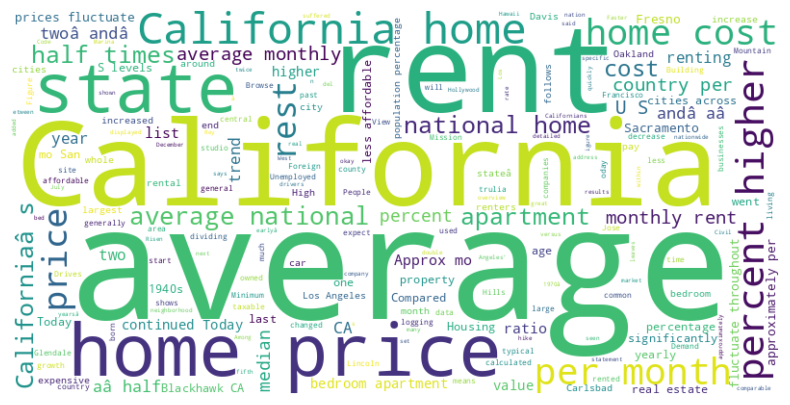

In [ ]:
# cell = doc_df.at[29, 'contents']

text = ' '.join(doc_df['contents'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import ast

In [ ]:
# Convert the lists in 'list_column' to a single string for each row
doc_df['test'] = doc_df['top10_words'].apply(lambda x: ' '.join(x))

doc_df


,id,contents,top10_words,tfidf_vector,Score,test
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670,average davis rent apartment bedroom 1197 1458...
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548,rent average oakland decrease 09 2017 2538 259...
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207,approx california mo 500 apartment approximate...
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767,approx mo california 500 apartment approximate...
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575,average california 000 approximately cost 50 5...
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414,average 000 home 180 240 440 50 840 andâ aâ
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907,average 000 costs home housing 180 240 440 50 840
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809,average percent added apartment california cal...
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469,average rent 11 200 apartment bed california c...
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393,ca california carlsbad average higher median p...


In [ ]:
combined_text = ' '.join(doc_df['test'])

# Split the combined text into words and calculate the vocabulary size
words = combined_text.split()
words

['average',
 'davis',
 'rent',
 'apartment',
 'bedroom',
 '1197',
 '1458',
 '1529',
 '2016',
 'apartments',
 'rent',
 'average',
 'oakland',
 'decrease',
 '09',
 '2017',
 '2538',
 '2591',
 '2754',
 '51',
 'approx',
 'california',
 'mo',
 '500',
 'apartment',
 'approximately',
 'average',
 'cost',
 'fluctuate',
 'home',
 'approx',
 'mo',
 'california',
 '500',
 'apartment',
 'approximately',
 'average',
 'cost',
 'fluctuate',
 'home',
 'average',
 'california',
 '000',
 'approximately',
 'cost',
 '50',
 '500',
 '59',
 'apartment',
 'fluctuate',
 'average',
 '000',
 'home',
 '180',
 '240',
 '440',
 '50',
 '840',
 'andâ',
 'aâ',
 'average',
 '000',
 'costs',
 'home',
 'housing',
 '180',
 '240',
 '440',
 '50',
 '840',
 'average',
 'percent',
 'added',
 'apartment',
 'california',
 'californians',
 'hike',
 'increase',
 'increased',
 'list',
 'average',
 'rent',
 '11',
 '200',
 'apartment',
 'bed',
 'california',
 'cities',
 'del',
 'expensive',
 'ca',
 'california',
 'carlsbad',
 'average'

In [ ]:
vocabulary = (list(set(words)))

print(len(vocabulary))



141


In [ ]:
vocabulary

['decrease',
 'born',
 '34th',
 'aâ',
 'blackhawk',
 'davis',
 'bed',
 '09',
 'view',
 'mission',
 'used',
 'cities',
 '2015',
 'browse',
 'estate',
 'apartments',
 'know',
 'fluctuate',
 '000',
 'average',
 'nj',
 '2014',
 '840',
 'population',
 'price',
 'business',
 '7195',
 '500',
 'sacramento',
 '600',
 'property',
 '2016',
 'actually',
 '1940',
 '18',
 '2017',
 'california',
 '626',
 '5th',
 'californians',
 '179',
 '675',
 '1970',
 'carlsbad',
 'minimum',
 'national',
 '20',
 'year',
 'rental',
 'companies',
 '1197',
 'approximately',
 '2010',
 '12',
 'californiaâ',
 'typical',
 'housing',
 'los',
 'oakland',
 'businesses',
 '11',
 '30',
 '180',
 '47',
 'apartment',
 'increase',
 'del',
 'dividing',
 'percent',
 '1940s',
 'intend',
 'ratio',
 '166',
 '1458',
 'hills',
 'rented',
 'bedroom',
 'home',
 'civil',
 'median',
 'prices',
 'approx',
 'andâ',
 'affordable',
 'compared',
 '97',
 'expect',
 'expensive',
 'list',
 'owned',
 '1980',
 '1529',
 'higher',
 'glendale',
 '2754',


In [ ]:
doc_df['test'] = doc_df['test'].astype(str)

In [ ]:
doc_df['test'][3]

'approx mo california 500 apartment approximately average cost fluctuate home'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=vocabulary)


matrix1 = vectorizer1.fit_transform(doc_df['test'])
array1 = matrix1.toarray()
size = array1.shape[1]

In [ ]:
array1

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
array1D = [array1[i] for i in range(30)]

doc_df['feature_vector'] = array1D
doc_df.pop('test')

doc_df


,id,contents,top10_words,tfidf_vector,Score,feature_vector
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
doc_df["true_label"] = 0

doc_df.loc[:9, 'true_label'] = 1

doc_df

,id,contents,top10_words,tfidf_vector,Score,feature_vector,true_label
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [ ]:
doc_df.iloc[0,5]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
doc_df['feature_vector'] = doc_df['feature_vector'].apply(lambda x: np.array(x))
doc_df


,id,contents,top10_words,tfidf_vector,Score,feature_vector,true_label
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [ ]:
test = doc_df["feature_vector"]

testt = pd.DataFrame(test)

testt

,feature_vector
0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df_split = pd.DataFrame(testt['feature_vector'].tolist())
df_split = df_split.rename(columns=dict(zip(df_split.columns, vocabulary)))
df_split

,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,fresno,state,real,central,percentage,county,240,start,1000,2538
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_concat = pd.concat([doc_df, df_split], axis=1)
df_concat


,id,contents,top10_words,tfidf_vector,Score,feature_vector,true_label,decrease,born,34th,...,fresno,state,real,central,percentage,county,240,start,1000,2538
0,8599033,"Rent trend data in Davis, California. As of Ju...","[average, davis, rent, apartment, bedroom, 119...","[0.43301270189221935, 0.43301270189221935, 0.4...",10.1670,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5440735,"Rent trend data in Oakland, California Get mor...","[rent, average, oakland, decrease, 09, 2017, 2...","[0.5852057359806528, 0.4681645887845223, 0.351...",10.1548,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5639218,The average cost of renting an apartment in Ca...,"[approx, california, mo, 500, apartment, appro...","[0.31980107453341566, 0.31980107453341566, 0.3...",10.1207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6167397,The average cost of renting an apartment in Ca...,"[approx, mo, california, 500, apartment, appro...","[0.3922322702763681, 0.3922322702763681, 0.294...",9.9767,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5639212,"In general, the cost of living in California i...","[average, california, 000, approximately, cost...","[0.5393598899705937, 0.40451991747794525, 0.26...",9.5575,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2911754,"Today, an average California home costs $440,0...","[average, 000, home, 180, 240, 440, 50, 840, a...","[0.47733437050543803, 0.318222913670292, 0.318...",9.5414,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2383513,"This trend has continued. Today, an average Ca...","[average, 000, costs, home, housing, 180, 240,...","[0.42857142857142855, 0.2857142857142857, 0.28...",9.1907,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,6699804,The site says that California rents have incre...,"[average, percent, added, apartment, californi...","[0.3779644730092272, 0.3779644730092272, 0.188...",9.1809,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,6699811,"West Hollywood, with an average two-bed rent o...","[average, rent, 11, 200, apartment, bed, calif...","[0.3651483716701107, 0.3651483716701107, 0.182...",9.1469,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8416719,"The median home price for homes in Carlsbad, C...","[ca, california, carlsbad, average, higher, me...","[0.39391929857916763, 0.39391929857916763, 0.3...",9.1393,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


X = df_concat.iloc[:, 7:]
y = df_concat['true_label']
dataset = pd.concat([X,y],axis=1)

dataset

,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,state,real,central,percentage,county,240,start,1000,2538,true_label
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model1 = RandomForestClassifier(max_depth=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=42)

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = model1.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred1))

print(classification_report(y_train, y_pred1))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
y_pred2 = model2.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred2))

print(classification_report(y_train, y_pred2))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
y_pred1

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [ ]:
y_pred2

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [ ]:
X_test

,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,fresno,state,real,central,percentage,county,240,start,1000,2538
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
T = X_test[1:2]

a = []


for column in T.columns:
    if T[column].any():
        a.append(column)


print(T[a])

    cities  average  california  los  bedroom  affordable  rent  angeles  740  \
15       1        1           1    1        1           1     1        1    1   

    160  
15    1  


In [ ]:
y_test

27    0
15    0
23    0
17    0
8     1
9     1
Name: true_label, dtype: int64

In [ ]:
import dice_ml
import warnings
warnings.filterwarnings('ignore')


d = dice_ml.Data(dataframe=dataset, continuous_features=[], outcome_name='true_label')


m = dice_ml.Model(model=model1, backend="sklearn")

exp = dice_ml.Dice(d, m, method="random")

e1 = exp.generate_counterfactuals(X_test[1:2], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(display_sparse_df=True,show_only_changes=True)



/usr/local/lib/python3.10/dist-packages/dice_ml/utils/exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "
100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

Query instance (original outcome : 0)


,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,state,real,central,percentage,county,240,start,1000,2538,true_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1.0)


,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,state,real,central,percentage,county,240,start,1000,2538,true_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
e1.visualize_as_list(display_sparse_df=True,show_only_changes=True)

Query instance (original outcome : 0)
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 0]

Diverse Counterfactual set (new outcome: 1.0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, '1', '1', 0, 

In [ ]:
cf = [0, 0, 0, 0, 1, 0, 0, '1', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, '1', 0, 1, 1, 0, 0, 0, 0, 0, '1', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '-', 0, 0, '-', '1', '-', 0, 0, 0, 0, 0, 0, 0, 0, 0, '-', 0, '1', 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1', 1, 0, 0, '-', 1, 0, 0, 0, 0, 0, '1', 0, 0, '1', 0, 0, 0, 0, 0, 0, 0, '1', 0, 0, 0, 0, 0, 0, 0, '-', 0, 0, '-', 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, '-', 0, 0, 0, 0]
copy_X= X_test.copy()
copy_X.loc[len(copy_X.index)] = cf

copy_X


,decrease,born,34th,aâ,blackhawk,davis,bed,09,view,mission,...,fresno,state,real,central,percentage,county,240,start,1000,2538
27,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,-,0,0,0,0


In [ ]:
pd.set_option('display.max_columns', None)
T = copy_X[6:7]

a = []


for column in T.columns:
    if T[column].any():
        a.append(column)

T[a]

,blackhawk,09,used,000,nj,2014,500,179,carlsbad,minimum,national,typical,los,180,list,owned,higher,glendale,835,440,code,51,lincoln,ca,160,percentage,county
6,1,1,1,1,1,1,1,-,-,1,-,-,1,1,1,1,-,1,1,1,1,-,-,1,1,1,-


In [ ]:
T = X_test[1:2]

a = []


for column in T.columns:
    if T[column].any():
        a.append(column)


print(T[a])

    cities  average  california  los  bedroom  affordable  rent  angeles  740  \
15       1        1           1    1        1           1     1        1    1   

    160  
15    1  


In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
!python /content/drive/MyDrive/convert_collection_to_jsonl.py --collection-path /content/drive/MyDrive/collection.tsv --output-folder /content/drive/MyDrive/index/


Converting collection...
Converted 0 docs, writing into file 1
Converted 100,000 docs, writing into file 1
Converted 200,000 docs, writing into file 1
Converted 300,000 docs, writing into file 1
Converted 400,000 docs, writing into file 1
Converted 500,000 docs, writing into file 1
Converted 600,000 docs, writing into file 1
Converted 700,000 docs, writing into file 1
Converted 800,000 docs, writing into file 1
Converted 900,000 docs, writing into file 1
Converted 1,000,000 docs, writing into file 2
Converted 1,100,000 docs, writing into file 2
Converted 1,200,000 docs, writing into file 2
Converted 1,300,000 docs, writing into file 2
Converted 1,400,000 docs, writing into file 2
Converted 1,500,000 docs, writing into file 2
Converted 1,600,000 docs, writing into file 2
Converted 1,700,000 docs, writing into file 2
Converted 1,800,000 docs, writing into file 2
Converted 1,900,000 docs, writing into file 2
Converted 2,000,000 docs, writing into file 3
Converted 2,100,000 docs, writing i

In [ ]:
!python -m pyserini.index.lucene --collection JsonCollection --input /content/drive/MyDrive/json\
 --index /content/drive/MyDrive/index_TOT/ --generator DefaultLuceneDocumentGenerator --threads 1 --storePositions --storeDocvectors --storeRaw
